<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_martix_vec(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    s = 0
    for i in range(len(X)):
        s += np.dot(X[i], V[i])

    return s



print(np.array_equal(sum_martix_vec([np.array([[1, 2], [3, 4]])], np.array([[1, 2]])), np.array([5, 11])))
print(np.array_equal(sum_martix_vec([np.array([[5, 4, 678], [45, 45, 3], [435, 6, 6]])], np.array([[5, 4, 1]])), np.array([719, 408, 2205])))
print(np.array_equal(sum_martix_vec([[[1]]], [[1]]), [1]))
print(np.array_equal(sum_martix_vec([], []), 0))


True
True
True
True


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)


print(np.array_equal(binarize(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])), np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])))
print(np.array_equal(binarize(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), 20), np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])))
print(np.array_equal(binarize(np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]), 0), np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])))
print(np.array_equal(binarize(np.array([[-1, -2], [-4, -5], [7, 8]]), 0), np.array([[0, 0], [0, 0], [1, 1]])))
  

True
True
True
True


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    return [set(row) for row in mat]

def unique_columns(mat):
  return [(set(column)) for column in zip(*mat)]


print(unique_rows([[1, 2], [5, 6],])==[{1,2}, {5,6}])
print(unique_columns([[1, 2], [5, 6],])==[{1,5}, {2,6}])
print(unique_columns([[1,2,3,4], [2,4,6,7]])==[{1,2}, {2,4}, {3,6}, {4,7}])

True
True
True


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

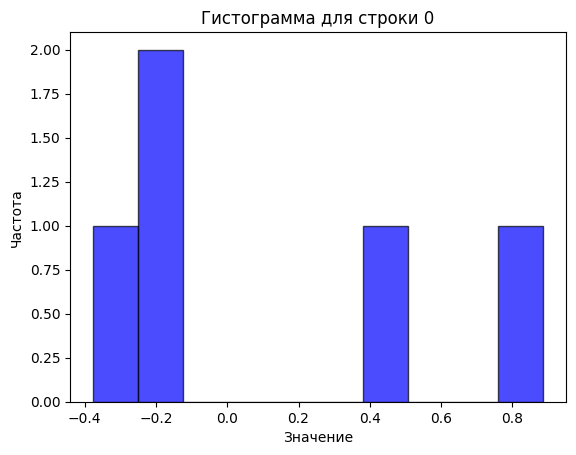

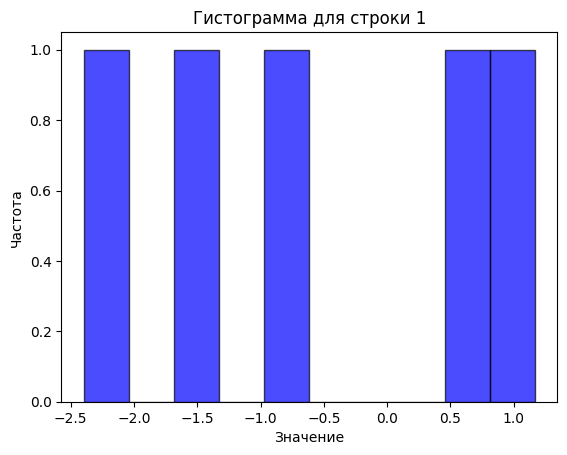

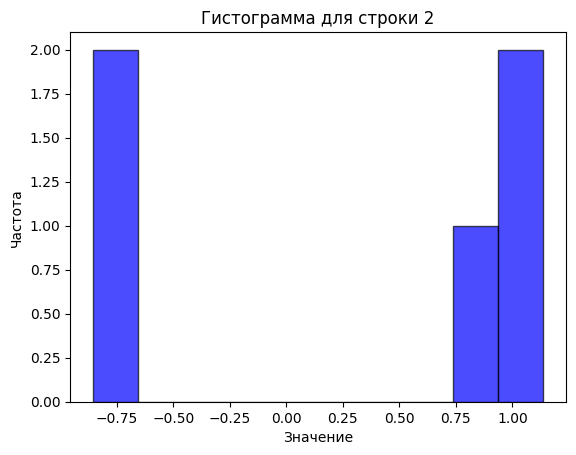

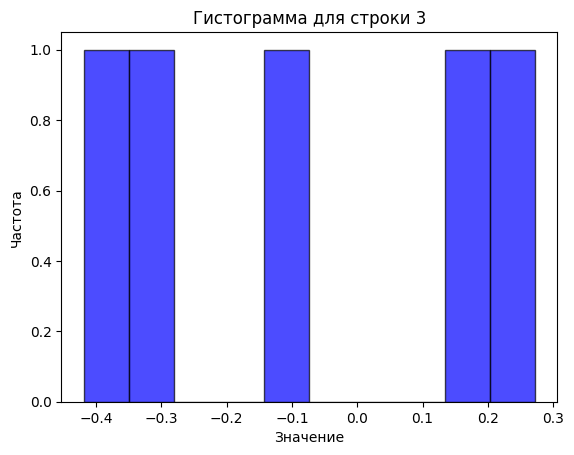

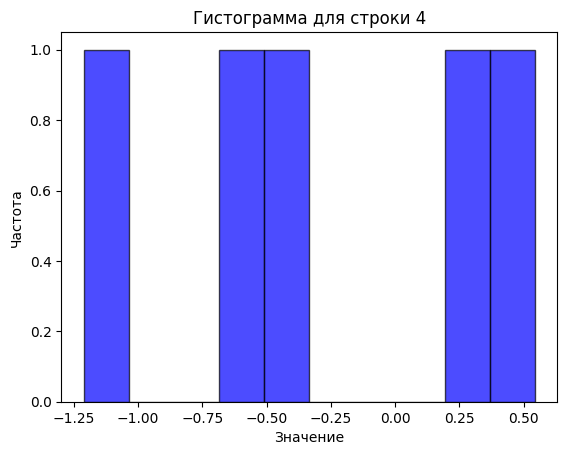

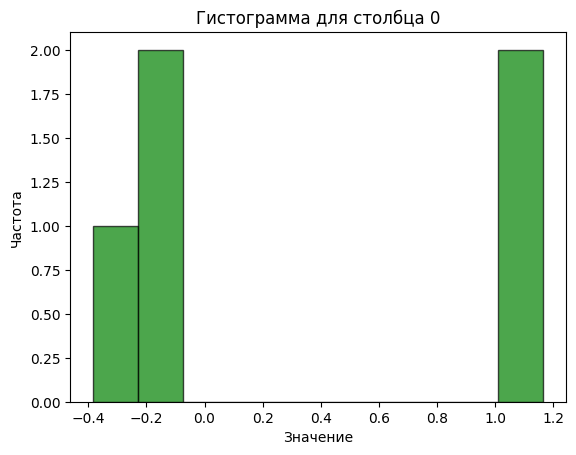

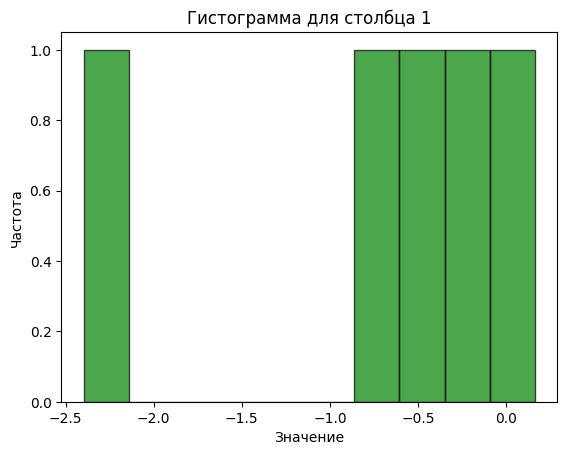

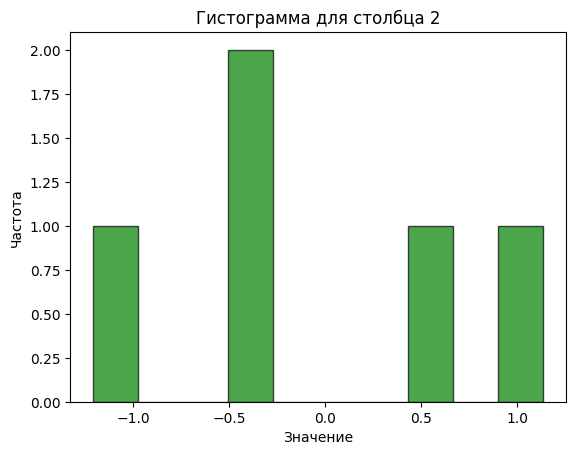

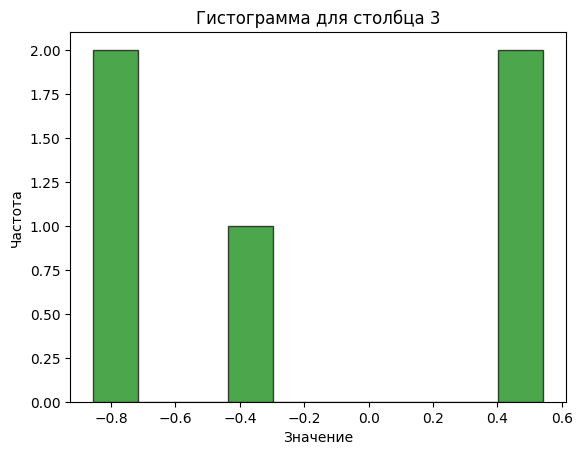

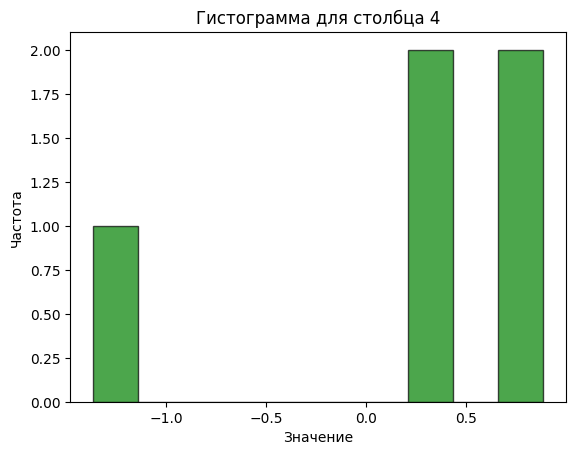

Матрица:
[[-0.20775103 -0.20972751 -0.3779208   0.47754792  0.88726699]
 [ 1.16680617 -2.39620014  0.48451699 -0.76475138 -1.36723456]
 [ 1.02663264 -0.76621615  1.13737547 -0.85730043  0.81940394]
 [-0.13074874  0.16274848 -0.41868492 -0.32110414  0.27171484]
 [-0.38535338 -0.57649662 -1.21094548  0.543233    0.27108752]]

Математическое ожидание для столбцов:
[ 0.29391713 -0.75717839 -0.07713175 -0.18447501  0.17644774]

Дисперсия для столбцов:
[0.43844555 0.77301756 0.65662866 0.35518311 0.66392885]

Математическое ожидание для строк:
[ 0.11388311 -0.57537258  0.27197909 -0.0872149  -0.27169499]

Дисперсия для строк:
[0.23608363 1.62737509 0.79424169 0.0715568  0.38934685]


In [14]:
def fill_and_analyze_matrix(m, n):
    matrix = np.random.normal(size=(m, n))

    # Вычисляем математическое ожидание и дисперсию для каждого столбца
    mean_columns = np.mean(matrix, axis=0)
    variance_columns = np.var(matrix, axis=0)

    # Вычисляем математическое ожидание и дисперсию для каждой строки
    mean_rows = np.mean(matrix, axis=1)
    variance_rows = np.var(matrix, axis=1)

 
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :], bins=10, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Гистограмма для строки {i}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Гистограмма для столбца {j}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.show()

    return matrix, mean_columns, variance_columns, mean_rows, variance_rows


m = 5
n = 5
matrix, mean_columns, variance_columns, mean_rows, variance_rows = fill_and_analyze_matrix(m, n)

print("Матрица:")
print(matrix)
print("\nМатематическое ожидание для столбцов:")
print(mean_columns)
print("\nДисперсия для столбцов:")
print(variance_columns)
print("\nМатематическое ожидание для строк:")
print(mean_rows)
print("\nДисперсия для строк:")
print(variance_rows)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [36]:
def chess(m, n, a, b):
    matrix = [[0 for _ in range(n)] for _ in range(m)]

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b

    return matrix


for row in  chess(3, 3, 1, 0):
    print(row)

print()

for row in  chess(5, 4, 52, 0):
    print(row)

print()

for row in  chess(10, 10, 123, 0):
    print(row)

[1, 0, 1]
[0, 1, 0]
[1, 0, 1]

[52, 0, 52, 0]
[0, 52, 0, 52]
[52, 0, 52, 0]
[0, 52, 0, 52]
[52, 0, 52, 0]

[123, 0, 123, 0, 123, 0, 123, 0, 123, 0]
[0, 123, 0, 123, 0, 123, 0, 123, 0, 123]
[123, 0, 123, 0, 123, 0, 123, 0, 123, 0]
[0, 123, 0, 123, 0, 123, 0, 123, 0, 123]
[123, 0, 123, 0, 123, 0, 123, 0, 123, 0]
[0, 123, 0, 123, 0, 123, 0, 123, 0, 123]
[123, 0, 123, 0, 123, 0, 123, 0, 123, 0]
[0, 123, 0, 123, 0, 123, 0, 123, 0, 123]
[123, 0, 123, 0, 123, 0, 123, 0, 123, 0]
[0, 123, 0, 123, 0, 123, 0, 123, 0, 123]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

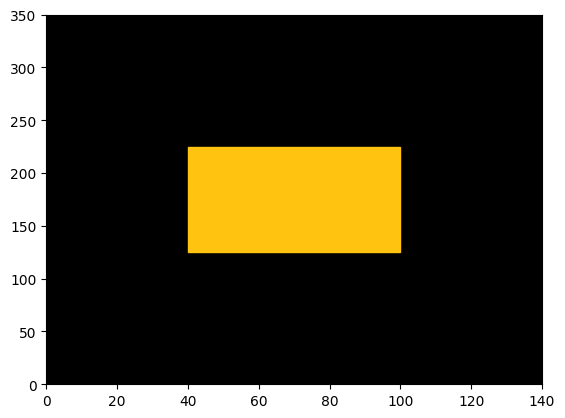

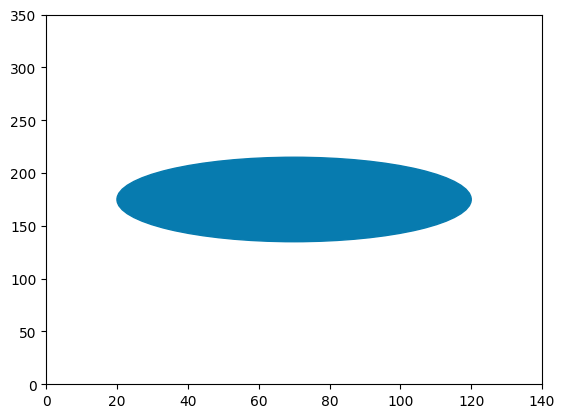

In [6]:
import matplotlib.patches as patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    background = patches.Rectangle((0, 0), m, n, color=background_color)
    ax.add_patch(background)
    rect = patches.Rectangle(((m - a) / 2, (n - b) / 2), a, b, color=rectangle_color)
    ax.add_patch(rect)

    plt.xlim(0, m)
    plt.ylim(0, n)

    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    background = patches.Rectangle((0, 0), m, n, color=background_color)
    ax.add_patch(background)
    a *= 2
    b *= 2
    eli = patches.Ellipse((m / 2, n / 2), a, b, color=ellipse_color)
    ax.add_patch(eli)

    plt.xlim(0, m)
    plt.ylim(0, n)

    plt.show()

draw_rectangle(60, 100, 140, 350, "#FFC310", "black")
draw_ellipse(50, 40, 140, 350, "#077BAF", "white")

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [16]:
import numpy as np

def time_series_analysis(ts, p):

    mean = np.mean(ts)
    variance = np.var(ts)
    deviation = np.std(ts)

    local_min = []
    local_max = []
    for i in range(1, len(ts) - 1):
        if ts[i] < ts[i - 1] and ts[i] < ts[i + 1]:
            local_min.append(ts[i])
        if ts[i] > ts[i - 1] and ts[i] > ts[i + 1]:
            local_max.append(ts[i])

    smooth_ts = np.convolve(ts, np.ones(p), mode='valid') / p

    return mean, variance, deviation, local_min, local_max, smooth_ts

mean, variance, deviation, local_max, local_min, smoothed_series = time_series_analysis(np.array([2, 4, 5, 6, 5, 1, 7, 3, 7, 9]), 3)

print("Математическое ожидание:", mean)
print("Дисперсия:", variance)
print("СКО:", deviation)
print("Локальные максимумы:", local_max)
print("Локальные минимумы:", local_min)
print("Скользящее среднее:", smoothed_series)

Математическое ожидание: 4.9
Дисперсия: 5.49
СКО: 2.3430749027719964
Локальные максимумы: [np.int64(1), np.int64(3)]
Локальные минимумы: [np.int64(6), np.int64(7)]
Скользящее среднее: [3.66666667 5.         5.33333333 4.         4.33333333 3.66666667
 5.66666667 6.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [7]:
def one_hot_encoding(vec):
    n_classes = np.max(vec) + 1
    one_hot = np.zeros((len(vec), n_classes), dtype=int)
    one_hot[np.arange(len(vec)), vec] = 1
    return one_hot

print(one_hot_encoding(np.array([0, 2, 3, 0])))

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
